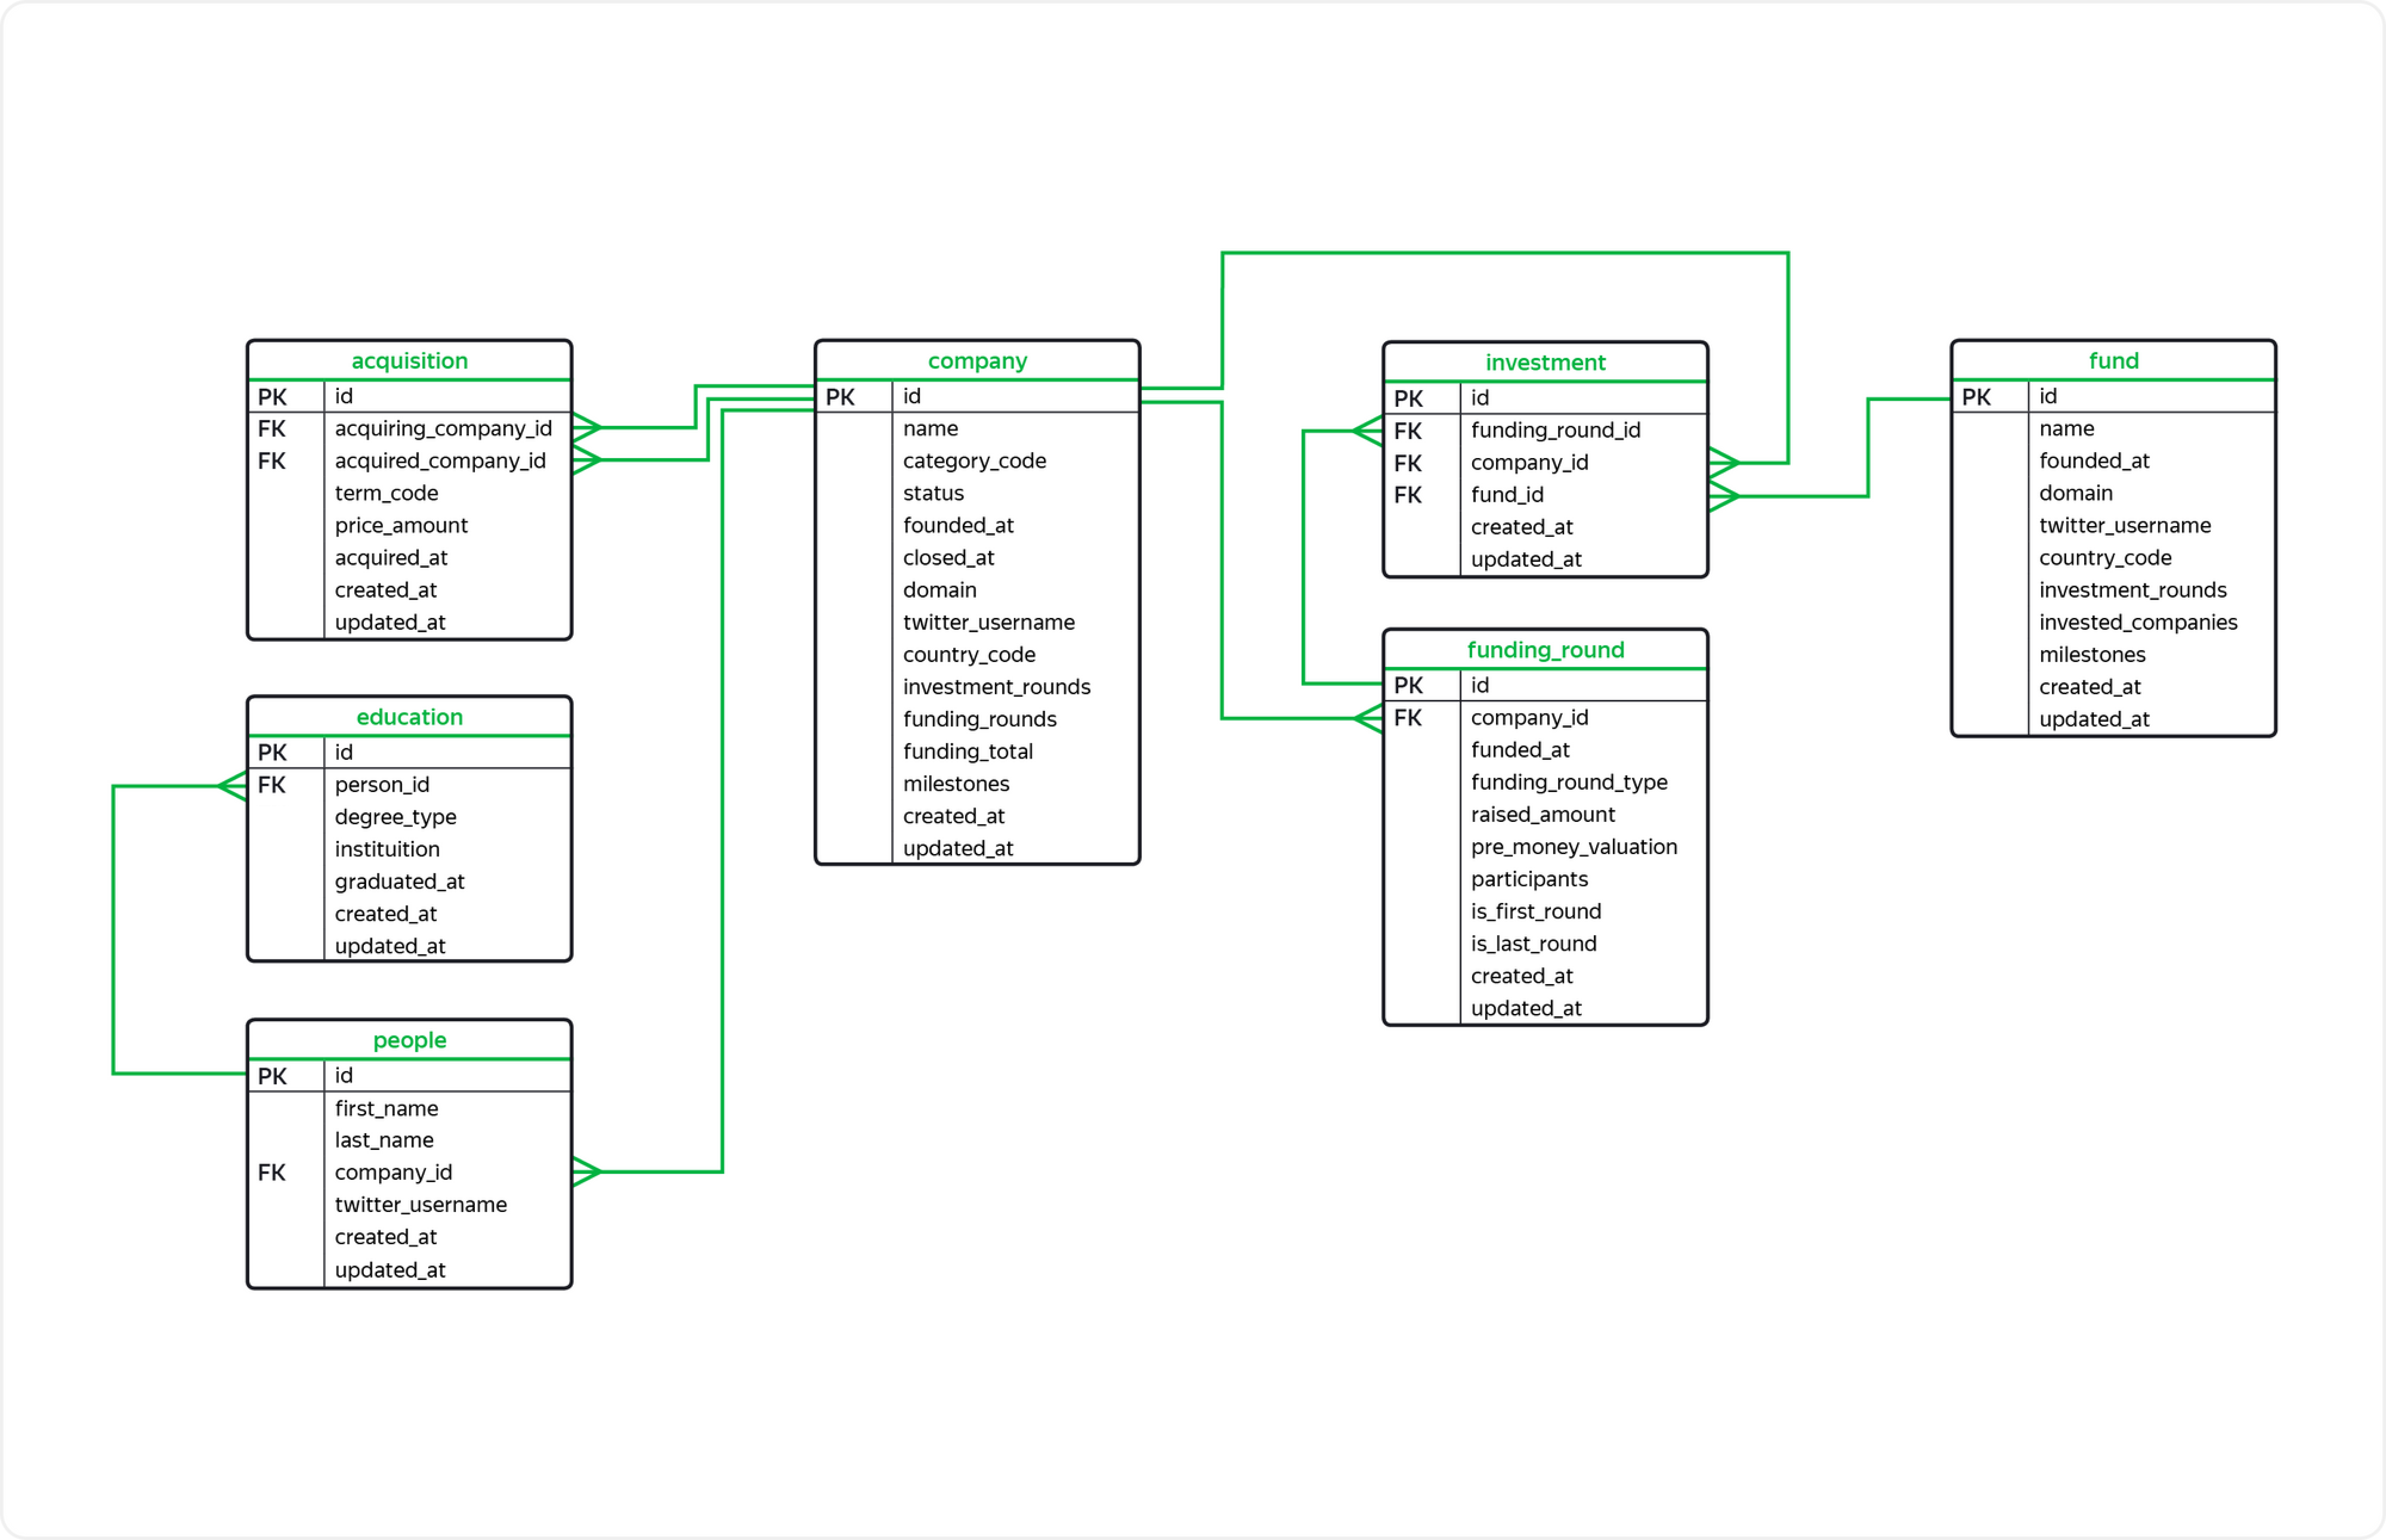

1.
Посчитайте, сколько компаний закрылось.

In [ ]:
SELECT COUNT(name)
FROM company
WHERE status = 'closed'

2.
Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируйте таблицу по убыванию значений в поле funding_total .

In [ ]:
SELECT funding_total
FROM company
WHERE category_code = 'news' AND country_code='USA'
ORDER BY funding_total DESC

3.
Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
SELECT SUM(price_amount)
FROM acquisition
WHERE term_code = 'cash'
      AND CAST(acquired_at AS date) BETWEEN '2011-01-01' AND '2013-12-31'

4.
Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на 'Silver'.

In [ ]:
SELECT first_name,
       last_name,
       twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%'

5.
Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'.

In [ ]:
SELECT *
FROM people
WHERE twitter_username LIKE '%money%'
      AND last_name LIKE 'K%' 

6.
Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
SELECT country_code,
       SUM(funding_total) 
FROM company
GROUP BY country_code
ORDER BY SUM(funding_total) DESC 

7.
Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT funded_at,
       MIN(raised_amount), 
       MAX(raised_amount)
FROM funding_round
GROUP BY funded_at
HAVING MIN(raised_amount) <> 0
       AND MIN(raised_amount) <> MAX(raised_amount)

8.
Создайте поле с категориями:
Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию high_activity.
Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию middle_activity.
Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию low_activity.
Отобразите все поля таблицы fund и новое поле с категориями.

In [ ]:
SELECT *,
       CASE
           WHEN invested_companies > 100 THEN 'high_activity'
           WHEN invested_companies < 20 THEN 'low_activity'
           ELSE 'middle_activity'
       END AS category
FROM fund

9.
Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [ ]:
WITH
activ AS (SELECT *,
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity
FROM fund)

SELECT activity,
       ROUND(AVG(investment_rounds)) 
FROM activ
GROUP BY  activity
ORDER BY ROUND(AVG(investment_rounds))

10.
Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы. 
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. 
Выгрузите десять самых активных стран-инвесторов: отсортируйте таблицу по среднему количеству компаний от большего к меньшему. Затем добавьте сортировку по коду страны в лексикографическом порядке.

In [ ]:
SELECT country_code,
       MIN(invested_companies),
       MAX(invested_companies),
       AVG(invested_companies)
FROM fund
WHERE founded_at BETWEEN '2010-01-01' AND '2012-12-31'
GROUP BY country_code
HAVING MIN(invested_companies) >0
ORDER BY AVG(invested_companies) DESC, country_code
LIMIT 10

11.
Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
SELECT first_name,
       last_name,
       e.instituition
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id

12.
Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
SELECT c.name,
COUNT(DISTINCT e.instituition)
FROM company AS c
JOIN people AS p ON c.id = p.company_id
JOIN education AS e ON p.id = e.person_id
GROUP BY c.name
ORDER BY COUNT(DISTINCT e.instituition) DESC
LIMIT 5;

13.
Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.

In [ ]:
WITH
closed AS (
SELECT id, name
FROM company
WHERE status='closed'
)

SELECT DISTINCT closed.name
FROM funding_round AS fr
JOIN closed ON fr.company_id = closed.id
WHERE is_first_round = 1 AND is_last_round=1
GROUP BY closed.name

14.
Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
WITH
    closed AS (
                SELECT id, name
                FROM company
                WHERE status='closed'
    ),
    cl_comp AS (SELECT DISTINCT fr.company_id AS c_id
                FROM funding_round AS fr
                JOIN closed ON fr.company_id = closed.id
                WHERE is_first_round = 1 AND is_last_round=1)

SELECT DISTINCT id
FROM people
WHERE company_id IN (SELECT c_id FROM cl_comp)

15.
Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
WITH
    closed AS (
                SELECT id, name
                FROM company
                WHERE status='closed'
    ),
    cl_comp AS (SELECT DISTINCT fr.company_id AS c_id
                FROM funding_round AS fr
                JOIN closed ON fr.company_id = closed.id
                WHERE is_first_round = 1 AND is_last_round=1),

     p_id AS  (SELECT DISTINCT id AS u_p_id
                FROM people
                WHERE company_id IN (SELECT c_id FROM cl_comp))
                
SELECT e.person_id,
       instituition 
FROM education AS e
JOIN p_id ON e.person_id = p_id.u_p_id
GROUP BY e.person_id, instituition

16.
Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.

In [ ]:
SELECT p.id,
COUNT(e.instituition)
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id
WHERE p.company_id IN
(SELECT c.id
FROM company AS c
JOIN funding_round AS fr ON c.id = fr.company_id
WHERE STATUS ='closed'
AND is_first_round = 1
AND is_last_round = 1
GROUP BY c.id)
GROUP BY p.id
HAVING COUNT(DISTINCT e.instituition) >0

17.
Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [ ]:
WITH base AS
            (SELECT p.id,
            COUNT(e.instituition)
            FROM people AS p
            LEFT JOIN education AS e ON p.id = e.person_id
            WHERE p.company_id IN
                                (SELECT c.id
                                FROM company AS c
                                JOIN funding_round AS fr ON c.id = fr.company_id
                                WHERE STATUS ='closed'
                                AND is_first_round = 1
                                AND is_last_round = 1
                                GROUP BY c.id)
            GROUP BY p.id
            HAVING COUNT(DISTINCT e.instituition) >0)
SELECT AVG(COUNT)
FROM base;

18.
Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook*.
*(сервис, запрещённый на территории РФ)

In [ ]:
WITH base AS
            (SELECT p.id,
            COUNT(e.instituition)
            FROM people AS p
            LEFT JOIN education AS e ON p.id = e.person_id
            WHERE p.company_id IN
                                (SELECT c.id
                                FROM company AS c
                                WHERE name = 'Facebook'
                                GROUP BY c.id)
            GROUP BY p.id
            HAVING COUNT(DISTINCT e.instituition) >0)
SELECT AVG(COUNT)
FROM base;

19.
Составьте таблицу из полей:
name_of_fund — название фонда;
name_of_company — название компании;
amount — сумма инвестиций, которую привлекла компания в раунде.
В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT f.name AS name_of_fund,
c.name AS name_of_company,
fr.raised_amount AS amount
FROM investment AS i
LEFT JOIN company AS c ON c.id = i.company_id
LEFT JOIN fund AS f ON i.fund_id = f.id
INNER JOIN 
(SELECT*
FROM funding_round
WHERE funded_at BETWEEN '2012-01-01' AND '2013-12-31')
AS fr ON fr.id = i.funding_round_id
WHERE c.milestones > 6;

20.
Выгрузите таблицу, в которой будут такие поля:
название компании-покупателя;
сумма сделки;
название компании, которую купили;
сумма инвестиций, вложенных в купленную компанию;
доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.
Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы. 
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

In [ ]:
WITH acquiring AS
(SELECT c.name AS buyer,
a.price_amount AS price,
a.id AS KEY
FROM acquisition AS a
LEFT JOIN company AS c ON a.acquiring_company_id = c.id
WHERE a.price_amount > 0),
acquired AS
(SELECT c.name AS acquisition,
c.funding_total AS investment,
a.id AS KEY
FROM acquisition AS a
LEFT JOIN company AS c ON a.acquired_company_id = c.id
WHERE c.funding_total > 0)
SELECT acqn.buyer,
acqn.price,
acqd.acquisition,
acqd.investment,
ROUND(acqn.price / acqd.investment) AS uplift
FROM acquiring AS acqn
JOIN acquired AS acqd ON acqn.KEY = acqd.KEY
ORDER BY price DESC, acquisition
LIMIT 10;

21.
Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
SELECT  c.name AS social_co,
EXTRACT (MONTH FROM fr.funded_at) AS funding_month
FROM company AS c
LEFT JOIN funding_round AS fr ON c.id = fr.company_id
WHERE c.category_code = 'social'
AND fr.funded_at BETWEEN '2010-01-01' AND '2013-12-31'
AND fr.raised_amount <> 0;

22.
Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
номер месяца, в котором проходили раунды;
количество уникальных названий фондов из США, которые инвестировали в этом месяце;
количество компаний, купленных за этот месяц;
общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH fundings AS
        (SELECT EXTRACT(MONTH FROM CAST(fr.funded_at AS DATE)) AS funding_month,
        COUNT(DISTINCT f.id) AS us_funds
        FROM fund AS f
        LEFT JOIN investment AS i ON f.id = i.fund_id
        LEFT JOIN funding_round AS fr ON i.funding_round_id = fr.id
        WHERE f.country_code = 'USA'
        AND EXTRACT(YEAR FROM CAST(fr.funded_at AS DATE)) BETWEEN 2010 AND 2013
        GROUP BY funding_month),
acquisitions AS
        (SELECT EXTRACT(MONTH FROM CAST(acquired_at AS DATE)) AS funding_month,
        COUNT(acquired_company_id) AS bought_co,
        SUM(price_amount) AS sum_total
        FROM acquisition
        WHERE EXTRACT(YEAR FROM CAST(acquired_at AS DATE)) BETWEEN 2010 AND 2013
        GROUP BY funding_month)
SELECT fnd.funding_month, fnd.us_funds, acq.bought_co, acq.sum_total
FROM fundings AS fnd
LEFT JOIN acquisitions AS acq ON fnd.funding_month = acq.funding_month;

23.
Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH 
y_12 AS (SELECT country_code,
        AVG(funding_total) AS avg_2012
        FROM company
        WHERE EXTRACT(YEAR FROM CAST(founded_at as date)) = 2012
        GROUP BY country_code),
y_13 AS (SELECT country_code,
        AVG(funding_total) AS avg_2013
        FROM company
        WHERE EXTRACT(YEAR FROM CAST(founded_at as date)) = 2013
        GROUP BY country_code)

SELECT c.country_code,
       AVG(funding_total) AS avg_2011,
       y_12.avg_2012,
       y_13.avg_2013
FROM company AS c 
JOIN y_12 ON c.country_code = y_12.country_code
JOIN y_13 ON c.country_code = y_13.country_code
WHERE EXTRACT(YEAR FROM CAST(founded_at as date)) = 2011
GROUP BY c.country_code,  y_12.avg_2012, y_13.avg_2013
ORDER BY avg_2011 DESC